=== Résultats KNN (k = 5) ===
Accuracy        : 0.933
Precision (macro): 0.944
Recall (macro)   : 0.933
F1-score (macro) : 0.933

=== Classification report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



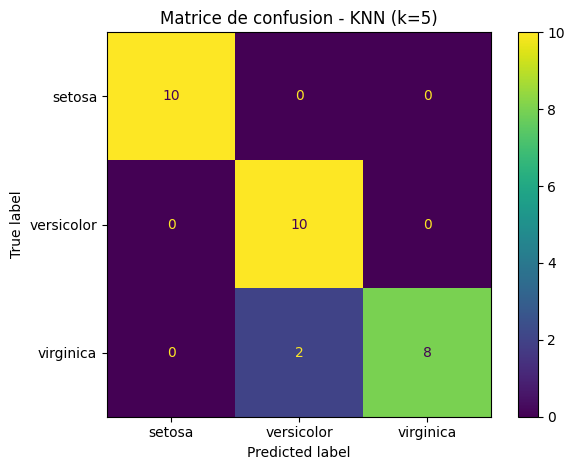

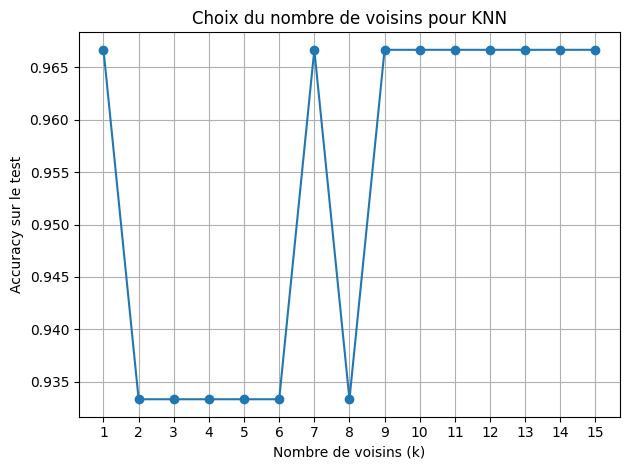

In [1]:
"""
knn_classification.py

Exemple complet d'utilisation de K-Nearest Neighbors (KNN)
pour un problème de classification.

Étapes :
1. Charger ou générer un dataset
2. Séparer en train / test
3. Normaliser les données
4. Entraîner un modèle KNN
5. Évaluer avec plusieurs métriques (accuracy, precision, recall, F1, matrice de confusion)
6. Tracer la courbe Accuracy en fonction de k (nombre de voisins)
"""

# ===============================
# 1. Imports
# ===============================
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris          # dataset d'exemple
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

# ===============================
# 2. Chargement des données
# ===============================
# Ici on utilise le dataset Iris (3 classes de fleurs).
# X : caractéristiques (longueur/largeur pétales, sépales)
# y : étiquettes de classes (0, 1, 2)
iris = load_iris()
X = iris.data
y = iris.target

# ===============================
# 3. Séparation train / test
# ===============================
# test_size=0.2 -> 20% pour le test
# stratify=y -> conserve la proportion de chaque classe
# random_state -> pour reproduire les mêmes résultats
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# ===============================
# 4. Normalisation des données
# ===============================
# KNN est sensible à l'échelle des variables.
# On standardise : moyenne = 0, variance = 1.
scaler = StandardScaler()

# On ajuste le scaler sur le train puis on transforme train et test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================
# 5. Entraînement d'un KNN
# ===============================
# Choix de k (nombre de voisins). Valeur typique : 3, 5, 7, ...
# On peut ajuster ce paramètre plus tard.
k = 5

knn = KNeighborsClassifier(
    n_neighbors=k,   # hyperparamètre principal de KNN
    metric='minkowski',  # distance (par défaut : euclidienne, p=2)
    p=2
)

# On "entraîne" le modèle (en KNN il mémorise surtout les exemples)
knn.fit(X_train_scaled, y_train)

# ===============================
# 6. Prédiction sur les données de test
# ===============================
y_pred = knn.predict(X_test_scaled)

# ===============================
# 7. Évaluation du modèle
# ===============================

# Accuracy globale
acc = accuracy_score(y_test, y_pred)

# Precision, Recall, F1 (en multiclasses on utilise "macro" pour
# faire la moyenne sur toutes les classes)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("=== Résultats KNN (k = {}) ===".format(k))
print(f"Accuracy        : {acc:.3f}")
print(f"Precision (macro): {precision:.3f}")
print(f"Recall (macro)   : {recall:.3f}")
print(f"F1-score (macro) : {f1:.3f}\n")

# Rapport détaillé par classe
print("=== Classification report ===")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=iris.target_names
)

# On affiche la matrice de confusion
disp.plot()
plt.title(f"Matrice de confusion - KNN (k={k})")
plt.tight_layout()
plt.show()

# ===============================
# 8. (Optionnel) Choix du meilleur k
# ===============================
# On teste plusieurs valeurs de k et on regarde l'accuracy sur le test
k_values = range(1, 16)  # k de 1 à 15
test_accuracies = []

for k_val in k_values:
    model = KNeighborsClassifier(n_neighbors=k_val)
    model.fit(X_train_scaled, y_train)
    y_pred_k = model.predict(X_test_scaled)
    acc_k = accuracy_score(y_test, y_pred_k)
    test_accuracies.append(acc_k)

# Tracé de l'accuracy en fonction de k
plt.figure()
plt.plot(k_values, test_accuracies, marker='o')
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Accuracy sur le test")
plt.title("Choix du nombre de voisins pour KNN")
plt.grid(True)
plt.xticks(k_values)
plt.tight_layout()
plt.show()


Classe prédite : 1


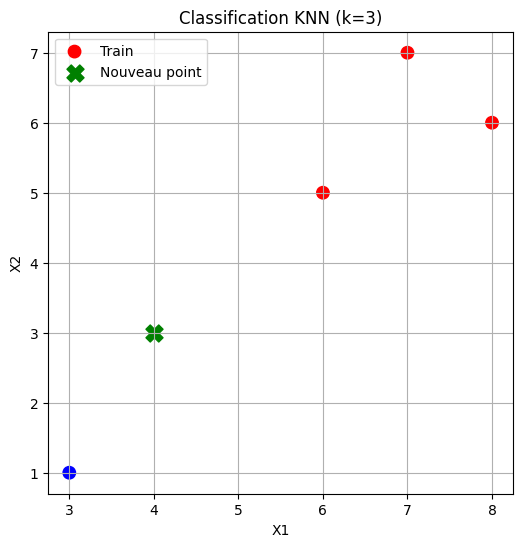

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Dataset jouet 2D
X = np.array([
    [1, 2], [2, 3], [3, 1],
    [6, 5], [7, 7], [8, 6]
])
y = np.array([0, 0, 0, 1, 1, 1])  # 0 = Classe A, 1 = Classe B

# Split train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# Modèle KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Nouveau point à prédire
new_point = np.array([[4, 3]])
prediction = model.predict(new_point)

print("Classe prédite :", prediction[0])  # attendu : 0

plt.figure(figsize=(6, 6))

# Points d'entraînement
plt.scatter(X_train[:, 0], X_train[:, 1],
            c=y_train, cmap="bwr", s=80, label="Train")

# Nouveau point
plt.scatter(new_point[:, 0], new_point[:, 1],
            c="green", s=150, marker="X", label="Nouveau point")

plt.title("Classification KNN (k=3)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

